In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ngoding/freelance/masdani/concat_data_full.csv')

In [ ]:
df

,Marktleistung,Verrechnungsbetrag,Periode,year
0,BWL FI: Finanzwesen/Controlling,213.0,2021.01,2018
1,BWL FI: Finanzwesen/Controlling,213.0,2021.01,2018
2,BWL FI: Finanzwesen/Controlling,10033.0,2021.01,2018
3,BWL FI: Finanzwesen/Controlling,213.0,2021.01,2018
4,BWL FS: Fachsupport,105.0,2021.01,2018
...,...,...,...,...
414565,IP LAN,48.0,2021.09,2021
414566,IP LAN,307200.0,2021.09,2021
414567,IP WAN,540000.0,2021.09,2021
414568,IP WAN,1250000.0,2021.09,2021


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414570 entries, 0 to 414569
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Marktleistung       414570 non-null  object 
 1   Verrechnungsbetrag  301626 non-null  float64
 2   Periode             414570 non-null  float64
 3   year                414570 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 12.7+ MB


In [ ]:
df = df[['Marktleistung', 'Verrechnungsbetrag']]

In [ ]:
df

,Marktleistung,Verrechnungsbetrag
0,BWL FI: Finanzwesen/Controlling,213.0
1,BWL FI: Finanzwesen/Controlling,213.0
2,BWL FI: Finanzwesen/Controlling,10033.0
3,BWL FI: Finanzwesen/Controlling,213.0
4,BWL FS: Fachsupport,105.0
...,...,...
414565,IP LAN,48.0
414566,IP LAN,307200.0
414567,IP WAN,540000.0
414568,IP WAN,1250000.0


In [ ]:
df['Marktleistung'].value_counts()

Arbeitsplatz Software Schale 2            55746
Betrieb Fachanwendung                     24828
BWL FI: Finanzwesen/Controlling           17520
IP WAN                                    11994
Arbeitsplatz Software Schale 3            11838
                                          ...  
File Transfer Service                        84
Speziallösung                                84
Managed Disc Encryption                      84
Personen- und Adressverifikation (PAV)       72
ePortal                                      36
Name: Marktleistung, Length: 117, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414570 entries, 0 to 414569
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Marktleistung       414570 non-null  object 
 1   Verrechnungsbetrag  301626 non-null  float64
dtypes: float64(1), object(1)
memory usage: 6.3+ MB


In [ ]:
df

,Marktleistung,Verrechnungsbetrag
0,BWL FI: Finanzwesen/Controlling,213.0
1,BWL FI: Finanzwesen/Controlling,213.0
2,BWL FI: Finanzwesen/Controlling,10033.0
3,BWL FI: Finanzwesen/Controlling,213.0
4,BWL FS: Fachsupport,105.0
...,...,...
414565,IP LAN,48.0
414566,IP LAN,307200.0
414567,IP WAN,540000.0
414568,IP WAN,1250000.0


In [ ]:
df = df.rename(columns={"Marktleistung": "Item", "Verrechnungsbetrag": "Transaction"})

In [ ]:
data = df

# corr

In [ ]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display

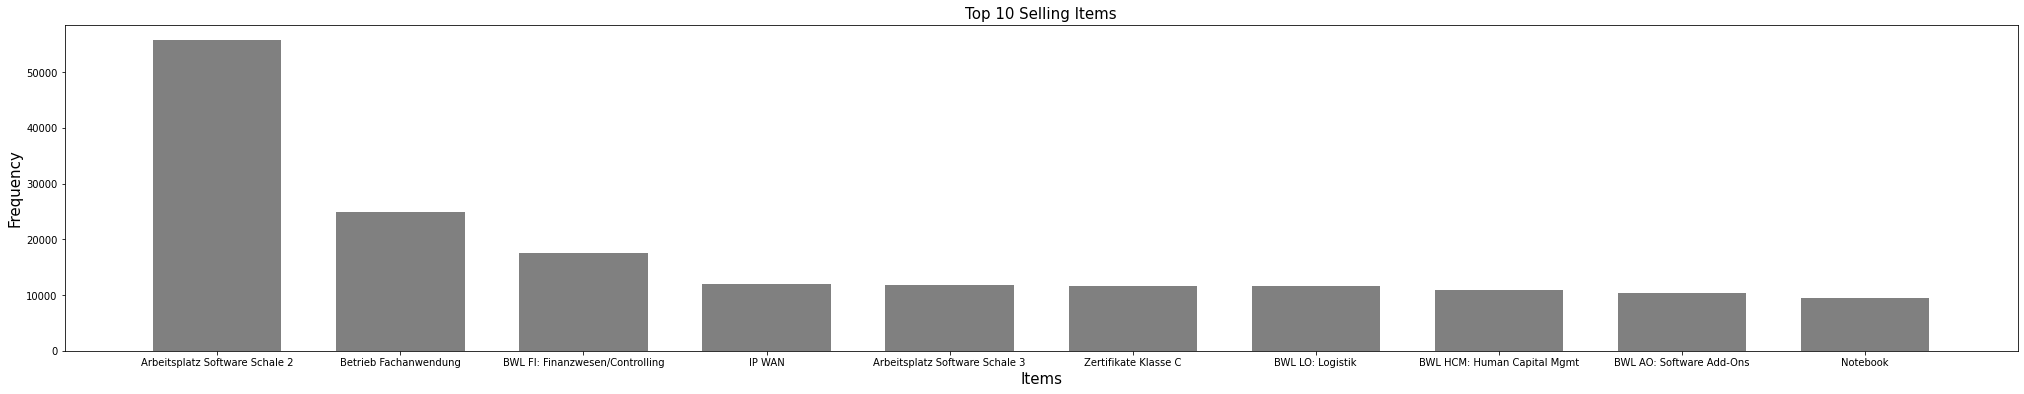

In [ ]:
items = data['Item'].value_counts().index
item_frequency = data['Item'].value_counts().values
plt.figure(figsize=(35,6))
plt.xlabel('Items', fontsize='15')
plt.ylabel('Frequency', fontsize='15')
plt.title('Top 10 Selling Items', fontsize='15')
plt.bar(items[:10],item_frequency[:10], width = 0.7, color="gray",linewidth=0.4)
plt.show()

In [ ]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().to_numpy()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]

In [ ]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item)


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item)


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders)

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [ ]:
#Data Transformation
#Transforming original dataframe into the expected format: Series
orders_series = data.set_index('Transaction')['Item']
#Display series as dataframe for cosmetic purposes
display(pd.DataFrame(orders_series.head(10))) 

,Item
Transaction,
213.0,BWL FI: Finanzwesen/Controlling
213.0,BWL FI: Finanzwesen/Controlling
10033.0,BWL FI: Finanzwesen/Controlling
213.0,BWL FI: Finanzwesen/Controlling
105.0,BWL FS: Fachsupport
5.0,BWL HCM: Human Capital Mgmt
3195.0,BWL HCM: Human Capital Mgmt
2866.0,BWL HCM: Human Capital Mgmt
3905.0,BWL HCM: Human Capital Mgmt


In [ ]:
#Data mining
rules = association_rules(orders_series, 0.01)

Starting order_item:                 414570
Items with support >= 0.01:              65
Remaining order_item:                391638
Remaining orders with 2+ items:       14512
Remaining order_item:                277792
Item pairs:                             993
Item pairs with support >= 0.01:         95



In [ ]:
display(rules.sort_values('confidenceBtoA', ascending=False).head(10))

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
10,Arbeitsplatz Software Schale 3,Arbeitsplatz Software Schale 3,7030,0.484427,10767,0.741938,10767,0.741938,0.652921,0.652921,0.880021
5,Software Schale 3a,Software Schale 3a,1142,0.078693,2790,0.192255,2790,0.192255,0.409319,0.409319,2.129046
86,Arbeitsplatz Software Schale 2,Internet,1200,0.082690,37637,2.593509,3589,0.247313,0.031884,0.334355,0.128920
22,Digital Asset Management SD,Digital Asset Management SD,492,0.033903,1542,0.106257,1542,0.106257,0.319066,0.319066,3.002781
94,Arbeitsplatz Software Schale 2,Digital Asset Management SD,492,0.033903,37637,2.593509,1542,0.106257,0.013072,0.319066,0.123025
85,Arbeitsplatz Software Schale 2,Software Schale 3a,850,0.058572,37637,2.593509,2790,0.192255,0.022584,0.304659,0.117470
7,Secure Messaging Extern,Secure Messaging Extern,1364,0.093991,4753,0.327522,4753,0.327522,0.286977,0.286977,0.876206
13,Secure Messaging Extern,Arbeitsplatz Software Schale 3,2862,0.197216,4753,0.327522,10767,0.741938,0.602146,0.265812,0.811586
2,Arbeitsplatz Software Schale 2,Arbeitsplatz Software Schale 2,8314,0.572905,37637,2.593509,37637,2.593509,0.220900,0.220900,0.085174
15,Arbeitsplatz Software Schale 2,Secure Messaging Extern,784,0.054024,37637,2.593509,4753,0.327522,0.020831,0.164948,0.063600


In [ ]:
rules

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
22,Digital Asset Management SD,Digital Asset Management SD,492,0.033903,1542,0.106257,1542,0.106257,0.319066,0.319066,3.002781
5,Software Schale 3a,Software Schale 3a,1142,0.078693,2790,0.192255,2790,0.192255,0.409319,0.409319,2.129046
10,Arbeitsplatz Software Schale 3,Arbeitsplatz Software Schale 3,7030,0.484427,10767,0.741938,10767,0.741938,0.652921,0.652921,0.880021
7,Secure Messaging Extern,Secure Messaging Extern,1364,0.093991,4753,0.327522,4753,0.327522,0.286977,0.286977,0.876206
13,Secure Messaging Extern,Arbeitsplatz Software Schale 3,2862,0.197216,4753,0.327522,10767,0.741938,0.602146,0.265812,0.811586
...,...,...,...,...,...,...,...,...,...,...,...
89,Druckgeräte,Arbeitsplatz Software Schale 2,219,0.015091,2274,0.156698,37637,2.593509,0.096306,0.005819,0.037134
0,BWL FI: Finanzwesen/Controlling,BWL FI: Finanzwesen/Controlling,372,0.025634,12473,0.859496,12473,0.859496,0.029824,0.029824,0.034700
91,Spezialgeräte,Arbeitsplatz Software Schale 2,228,0.015711,2586,0.178197,37637,2.593509,0.088167,0.006058,0.033995
53,Notebook,Arbeitsplatz Software Schale 3,153,0.010543,6135,0.422754,10767,0.741938,0.024939,0.014210,0.033613


In [ ]:
rules.to_csv('/content/drive/MyDrive/ngoding/freelance/masdani/corr_full.csv', index=False)

# heatmap - fix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ngoding/freelance/masdani/corr_full.csv')

In [ ]:
df

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Digital Asset Management SD,Digital Asset Management SD,492,0.033903,1542,0.106257,1542,0.106257,0.319066,0.319066,3.002781
1,Software Schale 3a,Software Schale 3a,1142,0.078693,2790,0.192255,2790,0.192255,0.409319,0.409319,2.129046
2,Arbeitsplatz Software Schale 3,Arbeitsplatz Software Schale 3,7030,0.484427,10767,0.741938,10767,0.741938,0.652921,0.652921,0.880021
3,Secure Messaging Extern,Secure Messaging Extern,1364,0.093991,4753,0.327522,4753,0.327522,0.286977,0.286977,0.876206
4,Secure Messaging Extern,Arbeitsplatz Software Schale 3,2862,0.197216,4753,0.327522,10767,0.741938,0.602146,0.265812,0.811586
...,...,...,...,...,...,...,...,...,...,...,...
90,Druckgeräte,Arbeitsplatz Software Schale 2,219,0.015091,2274,0.156698,37637,2.593509,0.096306,0.005819,0.037134
91,BWL FI: Finanzwesen/Controlling,BWL FI: Finanzwesen/Controlling,372,0.025634,12473,0.859496,12473,0.859496,0.029824,0.029824,0.034700
92,Spezialgeräte,Arbeitsplatz Software Schale 2,228,0.015711,2586,0.178197,37637,2.593509,0.088167,0.006058,0.033995
93,Notebook,Arbeitsplatz Software Schale 3,153,0.010543,6135,0.422754,10767,0.741938,0.024939,0.014210,0.033613


In [ ]:
# rules = df[df['item_A'].isin(['Arbeitsplatz Software Schale 2'])]

rules = df

In [ ]:
rules

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Digital Asset Management SD,Digital Asset Management SD,492,0.033903,1542,0.106257,1542,0.106257,0.319066,0.319066,3.002781
1,Software Schale 3a,Software Schale 3a,1142,0.078693,2790,0.192255,2790,0.192255,0.409319,0.409319,2.129046
2,Arbeitsplatz Software Schale 3,Arbeitsplatz Software Schale 3,7030,0.484427,10767,0.741938,10767,0.741938,0.652921,0.652921,0.880021
3,Secure Messaging Extern,Secure Messaging Extern,1364,0.093991,4753,0.327522,4753,0.327522,0.286977,0.286977,0.876206
4,Secure Messaging Extern,Arbeitsplatz Software Schale 3,2862,0.197216,4753,0.327522,10767,0.741938,0.602146,0.265812,0.811586
...,...,...,...,...,...,...,...,...,...,...,...
90,Druckgeräte,Arbeitsplatz Software Schale 2,219,0.015091,2274,0.156698,37637,2.593509,0.096306,0.005819,0.037134
91,BWL FI: Finanzwesen/Controlling,BWL FI: Finanzwesen/Controlling,372,0.025634,12473,0.859496,12473,0.859496,0.029824,0.029824,0.034700
92,Spezialgeräte,Arbeitsplatz Software Schale 2,228,0.015711,2586,0.178197,37637,2.593509,0.088167,0.006058,0.033995
93,Notebook,Arbeitsplatz Software Schale 3,153,0.010543,6135,0.422754,10767,0.741938,0.024939,0.014210,0.033613


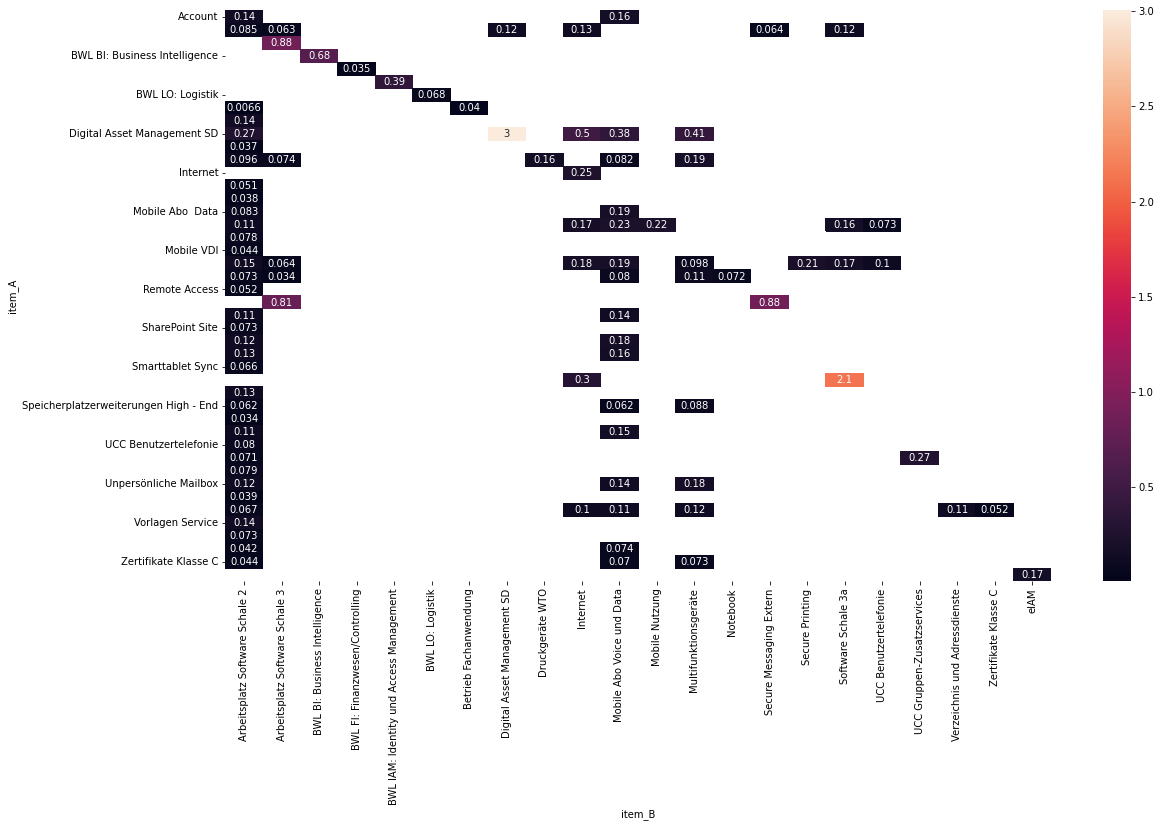

In [ ]:
# Import seaborn under its standard alias
import seaborn as sns
# Replace frozen sets with strings
# rules['item_A'] = rules['item_A'].apply(lambda a: ','.join(list(a)))
# rules['item_B'] = rules['item_B'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'item_A', columns = 'item_B', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# plt.savefig('heatmap.png', dpi=100)

# Concat data

In [ ]:
import pandas as pd

In [ ]:
df2018 = pd.read_csv('/content/drive/MyDrive/ngoding/freelance/masdani/Hochrechnungsreport_2018.csv')
df2019 = pd.read_excel('/content/drive/MyDrive/ngoding/freelance/masdani/Hochrechnungsreport_2019.xlsx')
df2020 = pd.read_csv('/content/drive/MyDrive/ngoding/freelance/masdani/Hochrechnungsreport_2020.csv')
df2021 = pd.read_csv('/content/drive/MyDrive/ngoding/freelance/masdani/Hochrechnungsreport_2021.csv')

In [ ]:
df2018.head(1)

,Departement,Amt,Debitor,DSTNr,Vetriebsweg,MWST,VTyp,VereinbarungNr,VertragsName,LeitungsKategorie,Marktleistungsgruppe,Marktleistung,MaterialNr,Material,PSPElement,MonthlyPrizePerUnit,UnitName,Periode,Amount,Verrechnungsbetrag,AbweichungMenge,AbweichungPreis,LineareHochrechnung,ExtrapolierteHochrechnung
0,BG,AB-BA,LVDR001117,109,KS,False,SLA,540000190,Applikationen betreiben BWL-SAP,Applikationen betreiben,Betriebswirtschaftliche Lösungen,BWL FI: Finanzwesen/Controlling,540003063,FIP Zähler: ML-User,KW01-00202.007.002,0.71,Stück,2021.01,30,21.3,NaN,NaN,255.6,255.6


In [ ]:
df2019.head(1)

,Departement,Amt,Debitor,DSTNr,Vertriebsweg,MWST,V-Typ,Vereinbarungs-Nr,Vertragstext,Leistungskategorie,Marktleistungsgruppe,Marktleistung,Material-Nr,Material,PSP-Nr,Aktueller Preis pro Monat,Einheit,Periode,Verrechnungsmenge,Verrechnungsbetrag,Abweichung Menge zu Vormonat,Abweichung Betrag zu Vormonat,Lineare Hochrechnung\nEnde Jahr,Extrapolierte Hochrechnung Ende Jahr
0,BG,AB-BA,LVDR001117,109,KS,False,SLA,540000186,Meine Berechtigungen und Zugänge,Meine Berechtigungen und Zugänge,Basisdienste Büroautomation,Account,540002631,"Account, Mailbox, Userhome exkl. Support",KW01-00105.002.009,26.0,# Domain Accounts,2019.01,4,104.0,NaN,NaN,1248.0,1248.0


In [ ]:
df2020.head(1)

,Departement,Amt,Debitor,DSTNr,Vetriebsweg,MWST,VTyp,VereinbarungNr,VertragsName,LeitungsKategorie,Marktleistungsgruppe,Marktleistung,MaterialNr,Material,PSPElement,MonthlyPrizePerUnit,UnitName,Periode,Amount,Verrechnungsbetrag,AbweichungMenge,AbweichungPreis,LineareHochrechnung,ExtrapolierteHochrechnung
0,BG,AB-BA,LVDR001117,109,KS,False,SLA,540000190,Applikationen betreiben BWL-SAP,Applikationen betreiben,Betriebwirtschaftliche Lösungen,BWL FI: Finanzwesen/Controlling,540003063,FIP Zähler: ML-User,KW01-00202.007.002,0.71,Stück,2020.01,29,20.59,NaN,NaN,247.08,247.08


In [ ]:
df2021.head(1)

,Departement,Amt,Debitor,DSTNr,Vetriebsweg,MWST,VTyp,VereinbarungNr,VertragsName,LeitungsKategorie,Marktleistungsgruppe,Marktleistung,MaterialNr,Material,PSPElement,MonthlyPrizePerUnit,UnitName,Periode,Amount,Verrechnungsbetrag,AbweichungMenge,AbweichungPreis,LineareHochrechnung,ExtrapolierteHochrechnung
0,BG,AB-BA,LVDR001117,109,KS,False,SLA,540000190,Applikationen betreiben BWL-SAP,Applikationen betreiben,Betriebswirtschaftliche Lösungen,BWL FI: Finanzwesen/Controlling,540003063,FIP Zähler: ML-User,KW01-00202.007.002,0.71,Stück,2021.01,30,21.3,NaN,NaN,255.6,255.6


In [ ]:
df2021 = df2021[['Marktleistung', 'Verrechnungsbetrag', 'Periode', 'LeitungsKategorie']]
df2020 = df2020[['Marktleistung', 'Verrechnungsbetrag', 'Periode', 'LeitungsKategorie']]
df2019 = df2019[['Marktleistung', 'Verrechnungsbetrag', 'Periode', 'LeitungsKategorie']]
df2018 = df2018[['Marktleistung', 'Verrechnungsbetrag', 'Periode', 'LeitungsKategorie']]

In [ ]:
df2021['year'] = 2021
df2020['year'] = 2020
df2019['year'] = 2019
df2018['year'] = 2018

In [ ]:
df = pd.concat([df2018, df2019, df2020, df2021])

In [ ]:
df

,Marktleistung,Verrechnungsbetrag,Periode,year
0,BWL FI: Finanzwesen/Controlling,21.3,2021.01,2018
1,BWL FI: Finanzwesen/Controlling,2.13,2021.01,2018
2,BWL FI: Finanzwesen/Controlling,100.33,2021.01,2018
3,BWL FI: Finanzwesen/Controlling,21.3,2021.01,2018
4,BWL FS: Fachsupport,1.05,2021.01,2018
...,...,...,...,...
91750,IP LAN,48,2021.09,2021
91751,IP LAN,3'072.00,2021.09,2021
91752,IP WAN,5'400.00,2021.09,2021
91753,IP WAN,12'500.00,2021.09,2021


In [ ]:
df['Verrechnungsbetrag'] = df['Verrechnungsbetrag'].str.replace(r'\D', '')
df['Verrechnungsbetrag'] = df['Verrechnungsbetrag'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414570 entries, 0 to 91754
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Marktleistung       414570 non-null  object 
 1   Verrechnungsbetrag  301626 non-null  float64
 2   Periode             414570 non-null  float64
 3   year                414570 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.8+ MB


In [ ]:
# df.to_csv('/content/drive/MyDrive/ngoding/freelance/masdani/concat_data_full.csv', index=False)

In [ ]:
df = df[df['Marktleistung'].isin(['Arbeitsplatz Software Schale 2', 
                                  'Arbeitsplatz Software Schale 3',
                                  'Internet',
                                  'RAS-Wartung',
                                  'Secure Messaging Extern',
                                  'Software Schale 3a'])]

In [ ]:
df

,Marktleistung,Verrechnungsbetrag,Periode,year
41,Arbeitsplatz Software Schale 2,42.0,2021.01,2018
42,Arbeitsplatz Software Schale 2,5432.0,2021.01,2018
43,Arbeitsplatz Software Schale 2,1197.0,2021.01,2018
44,Arbeitsplatz Software Schale 2,2925.0,2021.01,2018
45,Arbeitsplatz Software Schale 2,0.0,2021.01,2018
...,...,...,...,...
91745,Arbeitsplatz Software Schale 3,0.0,2021.09,2021
91746,Arbeitsplatz Software Schale 3,0.0,2021.09,2021
91747,Arbeitsplatz Software Schale 3,513.0,2021.09,2021
91748,Software Schale 3a,290.0,2021.09,2021


In [ ]:
df.to_csv('/content/drive/MyDrive/ngoding/freelance/masdani/concat_data_6item.csv', index=False)

# Heatmap - corr

In [ ]:
# import required libraries
import pandas as pd
  
# defining index for the dataframe
idx = ['1', '2', '3', '4']
  
# defining columns for the dataframe
cols = list('ABCD')
  
# entering values in the index and columns  
# and converting them into a panda dataframe
df = pd.DataFrame([[10, 20, 30, 40], [50, 30, 8, 15],
                   [25, 14, 41, 8], [7, 14, 21, 28]],
                   columns = cols, index = idx)
  
# displaying dataframe as an heatmap 
# with diverging colourmap as virdis
df.style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

,A,B,C,D
1,10,20,30,40
2,50,30,8,15
3,25,14,41,8
4,7,14,21,28


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ngoding/freelance/masdani/corr_full.csv')

In [ ]:
df.head()

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Digital Asset Management SD,Digital Asset Management SD,492,0.033903,1542,0.106257,1542,0.106257,0.319066,0.319066,3.002781
1,Software Schale 3a,Software Schale 3a,1142,0.078693,2790,0.192255,2790,0.192255,0.409319,0.409319,2.129046
2,Arbeitsplatz Software Schale 3,Arbeitsplatz Software Schale 3,7030,0.484427,10767,0.741938,10767,0.741938,0.652921,0.652921,0.880021
3,Secure Messaging Extern,Secure Messaging Extern,1364,0.093991,4753,0.327522,4753,0.327522,0.286977,0.286977,0.876206
4,Secure Messaging Extern,Arbeitsplatz Software Schale 3,2862,0.197216,4753,0.327522,10767,0.741938,0.602146,0.265812,0.811586


In [ ]:
item = df[df['item_A'].isin(['Arbeitsplatz Software Schale 2'])]

In [ ]:
item

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
38,Arbeitsplatz Software Schale 2,Internet,1200,0.082690,37637,2.593509,3589,0.247313,0.031884,0.334355,0.128920
41,Arbeitsplatz Software Schale 2,Digital Asset Management SD,492,0.033903,37637,2.593509,1542,0.106257,0.013072,0.319066,0.123025
43,Arbeitsplatz Software Schale 2,Software Schale 3a,850,0.058572,37637,2.593509,2790,0.192255,0.022584,0.304659,0.117470
56,Arbeitsplatz Software Schale 2,Arbeitsplatz Software Schale 2,8314,0.572905,37637,2.593509,37637,2.593509,0.220900,0.220900,0.085174
77,Arbeitsplatz Software Schale 2,Secure Messaging Extern,784,0.054024,37637,2.593509,4753,0.327522,0.020831,0.164948,0.063600
78,Arbeitsplatz Software Schale 2,Arbeitsplatz Software Schale 3,1767,0.121761,37637,2.593509,10767,0.741938,0.046948,0.164113,0.063278


In [ ]:
item = item.drop(columns=['item_A'])

In [ ]:
item

,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
38,Internet,1200,0.082690,37637,2.593509,3589,0.247313,0.031884,0.334355,0.128920
41,Digital Asset Management SD,492,0.033903,37637,2.593509,1542,0.106257,0.013072,0.319066,0.123025
43,Software Schale 3a,850,0.058572,37637,2.593509,2790,0.192255,0.022584,0.304659,0.117470
56,Arbeitsplatz Software Schale 2,8314,0.572905,37637,2.593509,37637,2.593509,0.220900,0.220900,0.085174
77,Secure Messaging Extern,784,0.054024,37637,2.593509,4753,0.327522,0.020831,0.164948,0.063600
78,Arbeitsplatz Software Schale 3,1767,0.121761,37637,2.593509,10767,0.741938,0.046948,0.164113,0.063278


In [ ]:
item = item.set_index(item['item_B'])

In [ ]:
item = item.drop(columns=['item_B'])

In [ ]:
item_transpos = item.T

In [ ]:
item_transpos

item_B,Internet,Digital Asset Management SD,Software Schale 3a,Arbeitsplatz Software Schale 2,Secure Messaging Extern,Arbeitsplatz Software Schale 3
freqAB,1200.000000,492.000000,850.000000,8314.000000,784.000000,1767.000000
supportAB,0.082690,0.033903,0.058572,0.572905,0.054024,0.121761
freqA,37637.000000,37637.000000,37637.000000,37637.000000,37637.000000,37637.000000
supportA,2.593509,2.593509,2.593509,2.593509,2.593509,2.593509
freqB,3589.000000,1542.000000,2790.000000,37637.000000,4753.000000,10767.000000
supportB,0.247313,0.106257,0.192255,2.593509,0.327522,0.741938
confidenceAtoB,0.031884,0.013072,0.022584,0.220900,0.020831,0.046948
confidenceBtoA,0.334355,0.319066,0.304659,0.220900,0.164948,0.164113
lift,0.128920,0.123025,0.117470,0.085174,0.063600,0.063278


In [ ]:
item_transpos.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'})

item_B,Internet,Digital Asset Management SD,Software Schale 3a,Arbeitsplatz Software Schale 2,Secure Messaging Extern,Arbeitsplatz Software Schale 3
freqAB,1200.000000,492.000000,850.000000,8314.000000,784.000000,1767.000000
supportAB,0.082690,0.033903,0.058572,0.572905,0.054024,0.121761
freqA,37637.000000,37637.000000,37637.000000,37637.000000,37637.000000,37637.000000
supportA,2.593509,2.593509,2.593509,2.593509,2.593509,2.593509
freqB,3589.000000,1542.000000,2790.000000,37637.000000,4753.000000,10767.000000
supportB,0.247313,0.106257,0.192255,2.593509,0.327522,0.741938
confidenceAtoB,0.031884,0.013072,0.022584,0.220900,0.020831,0.046948
confidenceBtoA,0.334355,0.319066,0.304659,0.220900,0.164948,0.164113
lift,0.128920,0.123025,0.117470,0.085174,0.063600,0.063278
